In [1]:
import glob
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import os
from sklearn.model_selection import train_test_split

In [2]:
filepaths = glob.glob("..\\raw_data\\**\\*.jpg", recursive=True)

In [3]:
df = pd.DataFrame(filepaths, columns=["img_id"])
df["img_id"] = df["img_id"].apply(lambda x: x.replace("..\\raw_data\\", ""))
df["plant"] = df["img_id"].apply(lambda x: x.split("\\")[0])
df["condition"] = df["img_id"].apply(lambda x: x.split("\\")[1])
df["plant_condition"] = df["plant"] + "_" + df["condition"]

In [4]:
len(df)

81028

In [5]:
for condition in sorted(df["condition"].unique()):
    df[condition] = df["condition"].apply(lambda x: int(x == condition))

In [6]:
train, dev_test = train_test_split(df, train_size=0.6, random_state=42, shuffle=True, stratify=df["plant_condition"])

In [7]:
dev, test = train_test_split(dev_test, test_size=0.5, random_state=42, shuffle=True, stratify=dev_test["plant_condition"])

In [8]:
len(train), len(dev), len(test)

(48616, 16206, 16206)

In [9]:
train["split"] = "train"
dev["split"] = "dev"
test["split"] = "test"

df = pd.concat([train, dev, test], axis=0).reset_index(drop=True)

<ipython-input-9-c84aa4cf0508>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["split"] = "train"
<ipython-input-9-c84aa4cf0508>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev["split"] = "dev"
<ipython-input-9-c84aa4cf0508>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

<AxesSubplot:xlabel='split', ylabel='Count'>

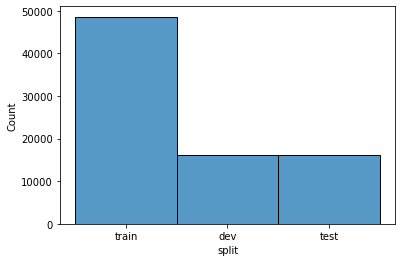

In [10]:
sns.histplot(df["split"])

<AxesSubplot:xlabel='plant_condition', ylabel='Count'>

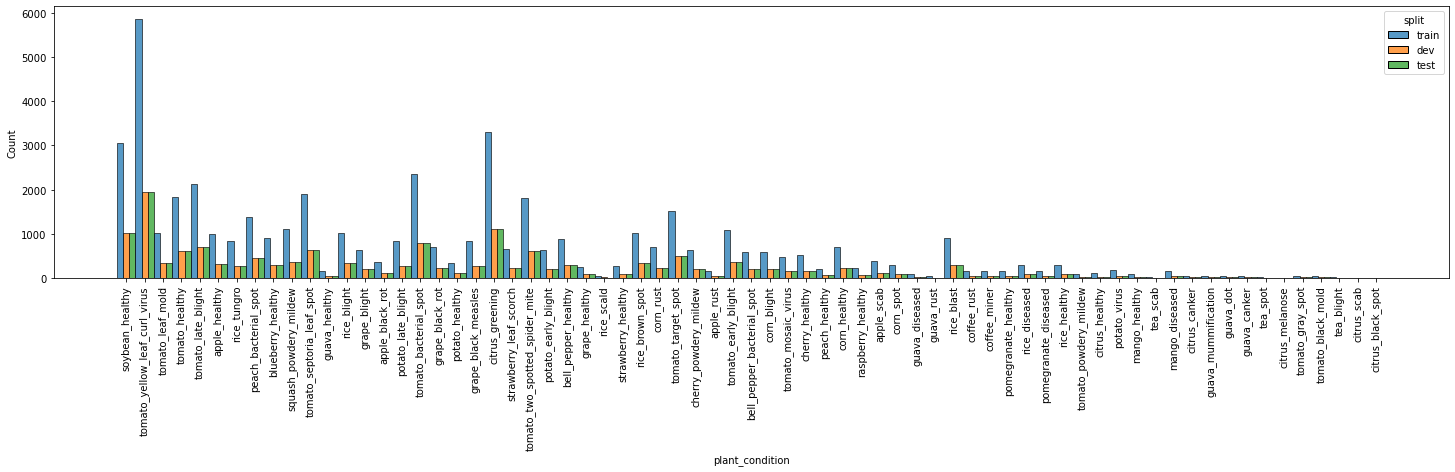

In [11]:
plt.figure(figsize=(25, 5))
plt.xticks(rotation=90)
sns.histplot(data=df, x="plant_condition", hue="split", multiple="dodge")

In [12]:
df.to_csv("data.csv", index=False)